Setup
- Create a venv and install numpy and matplotlib: <br>
python3 -m venv .venv
source .venv/bin/activate
pip install numpy matplotlib ipykernel

- In vscode select this venv as the interpreter (select kernel in top right and choose Python environment - the .venv folder shold be listed)

In [1]:
import numpy as np
import numpy.random
import matplotlib.pyplot as plt

# this is probably the default, but just in case
%matplotlib inline

# LINEAR REGRESSION

### Plot a linear function

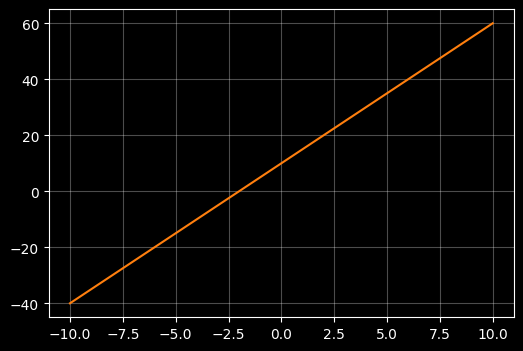

In [2]:
# Use X an Y to denote a set of points to plot
# np.linspace creates 100 evenly spaced numbers over the interval -10 to +10 and assigns them to xx
# yy is a linear function of xx: y = m*x + c
X = np.linspace(-10, 10, 100)

# Lets old school rquation of a line y = mx + c where m is slope and c is intercept with the y axis
m = 5
c = 10 # intercept
Y = m*X + c

# use a dark background and light gridlines to show
with plt.style.context("dark_background"):
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(X, Y, color="#ff7f0e")
    ax.grid(True, alpha=0.3)



### Find some 'noisy' samples close to that linear function

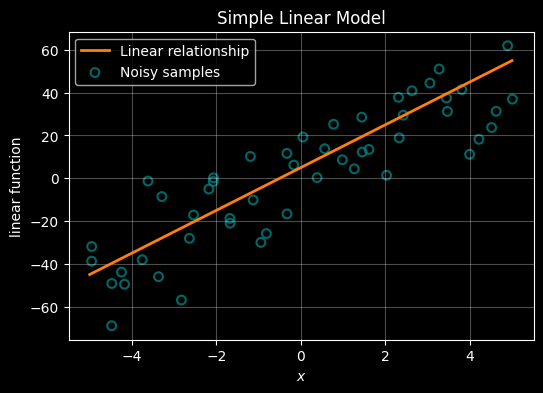

In [3]:
# Fist create a smooth ccubic xurve of 400 points between -5 and 5
X = np.linspace(-5, 5 , 400)
m = 10
c = 5 # intercept
Y = m*X + c


# Now lets seprately create 50 samples that sort of follow that curve
# TO achieve that we add some random noise using a random noise gnereator
rng = np.random.default_rng(42)
X_samp = np.linspace(-5, 5, 50) + rng.normal(loc=0.0, scale=0.15, size=50)
Y_samp = m*X_samp + c + rng.normal(loc=0.0, scale=20.0, size=50)

# --- plot ---
with plt.style.context("dark_background"):
    fig, ax = plt.subplots(figsize=(6, 4))

    # plot the cubic line
    ax.plot(X, Y, color="#ff7f0e", linewidth=2, label=r"Linear relationship")

    # plot the sample points
    ax.scatter(X_samp, Y_samp, s=40, marker="o", facecolors="none",\
        edgecolors="teal",linewidths=1.5, alpha=0.8, label="Noisy samples" )

    ax.grid(True, alpha=0.3)
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"linear function")
    ax.set_title("Simple Linear Model")
    ax.legend()

plt.show()

### Esimtate the underlying linear function using only the noisy samples

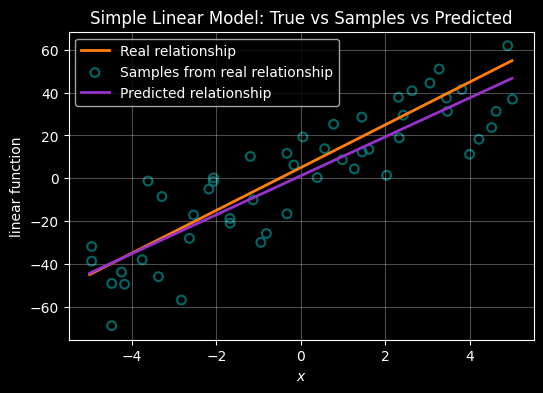

In [4]:
# NOw lets use those same observations to see if we can preduct the underlying relationship

# Create a smooth underlying linear relationship (the "true" relatinship that we're trying to work out)
X = np.linspace(-5, 5, 400)
m = 10
c = 5  # intercept
Y = m * X + c

# Create noisy samples around that true line - these represent the samples we would take in the real world
# Our challenge is to find the underlying relationship using only these samples - ie to guess what the orange line is
rng = np.random.default_rng(42)
X_samp = np.linspace(-5, 5, 50) + rng.normal(loc=0.0, scale=0.15, size=50)
Y_samp = m * X_samp + c + rng.normal(loc=0.0, scale=20.0, size=50)

# ------------------------------------------------------------
# We can use a formula to infer the underlying relationship from the samples using the normal equation:
#
#  
#
# A line is defined by its slope (m) and intercept (c) - we refer to these as the 'parameters' of the model we're trying to determine.
# The parameters are stored in a weights vector (often labelled 'W'). W = [c, m] (intercept, slope)
#
# If X contains the sample's x-coordinates (with a leading column of 1s for the intercept)
# and Y contains the observed sample y-values, then W can be determined from:
#
#  W = (Xᵀ X)⁻¹ Xᵀ Y
#
# We can then extract the intercept and slope from W and draw the predicted linear relationship
#
# The beauty of this simple formula is that it extends naturally to cases where each sample has multiple features (input dimensions).
# However, if the underlying relationship is not linear, we need to use different approaches as we shall see later.
# 
# ------------------------------------------------------------

X_design = np.column_stack([np.ones_like(X_samp), X_samp])

# Predict the weights from the 
W = np.linalg.inv(X_design.T @ X_design) @ (X_design.T @ Y_samp)

# extract predicted intercept and slope
c_pred, m_pred = W

# Predicted line over the same X range as the true line
Y_pred = m_pred * X + c_pred

# --- plot ---
with plt.style.context("dark_background"):
    fig, ax = plt.subplots(figsize=(6, 4))

    # True underlying relationship (orange)
    ax.plot(X, Y, color="#ff7f0e", linewidth=2, label="Real relationship")

    # Noisy samples (teal)
    ax.scatter(X_samp, Y_samp, s=40, marker="o", facecolors="none",
               edgecolors="teal", linewidths=1.5, alpha=0.8, label="Samples from real relationship")

    # Best fit-ilne inferrred from the samples
    ax.plot(X, Y_pred, color="darkorchid", linewidth=2, label="Predicted relationship")

    ax.grid(True, alpha=0.3)
    ax.set_xlabel(r"$x$")
    ax.set_ylabel("linear function")
    ax.set_title("Simple Linear Model: True vs Samples vs Predicted")
    ax.legend()

plt.show()


# Regression when the relationship between X and Y is quadratic

### Plot a quadratic function (polynomial of order 2)

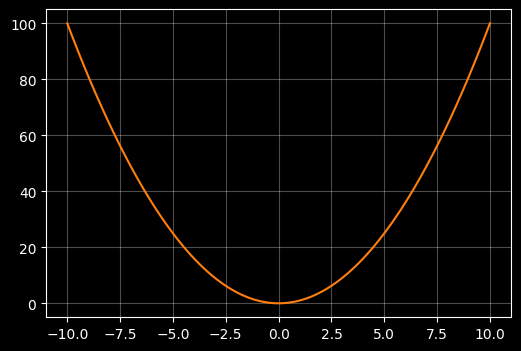

In [27]:
# create some simple data to plot - 
# np.linspace creates 100 evenly spaced numbers over the interval -10 to +10 and assigns them to X
# Y is just squaring X
X = np.linspace(-10,10,100)
Y = X * X

# plot the points
# use a dark background and light gridlines to show
with plt.style.context("dark_background"):
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(X, Y, color="#ff7f0e")
    ax.grid(True, alpha=0.3)

### Plot noisy smaples that align to that quadratic

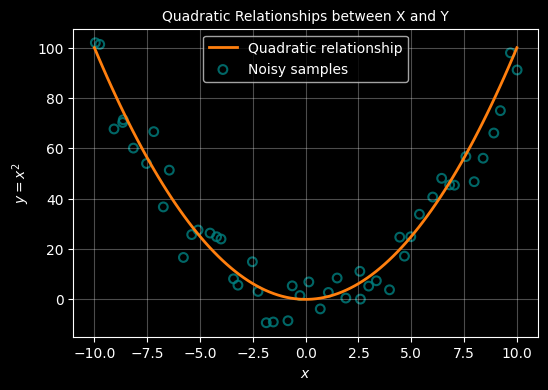

In [ ]:
# Now lets seprately create 50 samples that sort of follow that curve
# TO achieve that we add some random noise using a random noise gnereator
rng = np.random.default_rng(42)

X = np.linspace(-10,10,100)
Y = X * X

X_samp = np.linspace(-10, 10, 50) + rng.normal(loc=0.0, scale=0.15, size=50)
Y_samp = X_samp * X_samp + rng.normal(loc=0.0, scale=10.0, size=50)

# --- plot ---
with plt.style.context("dark_background"):
    fig, ax = plt.subplots(figsize=(6, 4))

    # plot the cubic line
    ax.plot(X, Y, color="#ff7f0e", linewidth=2, label=r"Quadratic relationship")

    # plot the sample points
    ax.scatter(X_samp, Y_samp, s=40, marker="o", facecolors="none",\
        edgecolors="teal",linewidths=1.5, alpha=0.8, label="Noisy samples" )

    ax.grid(True, alpha=0.3)
    ax.set_xlabel(r"$x$")
    ax.set_ylabel('$y = x^2$')
    ax.set_title("Quadratic relationship between X and Y", fontsize="10")
    ax.legend()

plt.show()

### Estimate the quadratic from the samples
A quadratic relationship between $x$ and $y$ line has the form: $y = ax^2 +bx + c$

This relationship is defined by 3 'variables' ($a,b,c$) that we need to predict from the samples. To achieve that, we must add a new dimension to our samples - a process called feature transformation. Beyond that the approach is the same as above - we can use the formula :

$

### Determining the weights

A quadratic relationship between $x$ and $y$ line has the form: $y = ax^2 +bx + c$ . This formula now has 3 unknowns $a,b,c$ which need to be determined - these are the parameters of the model. To achieve this, where we only have 1 feature for each x, we must add a new feature - a process called 'feature transformation'. With this added feature, we can use the **same formula** as for the linear case to determine the parameters.

Our exrta feature will just be the square of $x$ - so we now have $(x, x^2)$ for each observation. We use this to construct a *design matrix* \(X\) and also add a '1' as a first feature - this allows us to capture the constant $c$.

$
X =
\begin{bmatrix}
1 & x_1 & x_1^2 \\
1 & x_2 & x_2^2 \\
\vdots & \vdots & \vdots \\
1 & x_n & x_n^2
\end{bmatrix}
$

Using this design matrix, the weights (ie parameters ie {a,b,c}$ are still computed using the same equation as above:

$
W = (X^\top X)^{-1} X^\top y
$

The resulting weights vector from which we can extract the parameters of the quadrtic is:

$
W =
\begin{bmatrix}
c \\
b \\
a
\end{bmatrix}
$

which we can then use to reconstruct the curve using the quadratic equation:

$
y = ax^2 + bx + c
$


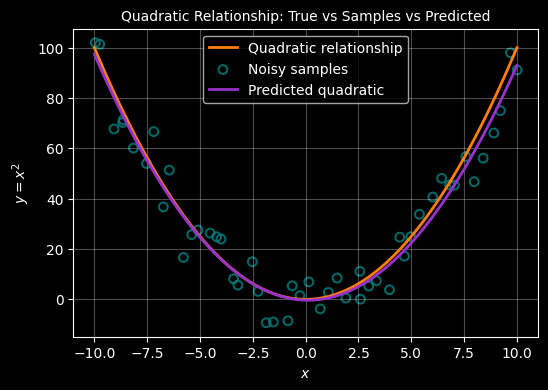

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Create a reproducible random number generator
rng = np.random.default_rng(42)

# ------------------------------------------------------------
# True underlying quadratic relationship
# ------------------------------------------------------------
X = np.linspace(-10, 10, 100)
Y = X * X

# ------------------------------------------------------------
# Noisy samples around the quadratic
# ------------------------------------------------------------
X_samp = np.linspace(-10, 10, 50) + rng.normal(loc=0.0, scale=0.15, size=50)
Y_samp = X_samp * X_samp + rng.normal(loc=0.0, scale=10.0, size=50)




# ------------------------------------------------------------
# Feature transformation for quadratic regression
#
# Add a new feature to each sample - x^2:
#   [1, x, x^2]
# ------------------------------------------------------------
X_design = np.column_stack([
    np.ones_like(X_samp),
    X_samp,
    X_samp**2
])

# Determine the weights
#   W = (Xᵀ X)⁻¹ Xᵀ y
W = np.linalg.inv(X_design.T @ X_design) @ (X_design.T @ Y_samp)

# Unpack the parameters from W 
c_pred, b_pred, a_pred = W

# Predicted quadratic curve
Y_pred = a_pred * X**2 + b_pred * X + c_pred

# ------------------------------------------------------------
# Plot
# ------------------------------------------------------------
with plt.style.context("dark_background"):
    fig, ax = plt.subplots(figsize=(6, 4))

    # True quadratic
    ax.plot(X, Y, color="#ff7f0e", linewidth=2, label="Quadratic relationship")

    # Noisy samples
    ax.scatter(
        X_samp, Y_samp,
        s=40, marker="o",
        facecolors="none", edgecolors="teal",
        linewidths=1.5, alpha=0.8,
        label="Noisy samples"
    )

    # Inferred quadratic
    ax.plot(X, Y_pred, color="darkorchid", linewidth=2, label="Predicted quadratic")

    ax.grid(True, alpha=0.3)
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$y = x^2$")
    ax.set_title("Quadratic Relationship: True vs Samples vs Predicted", fontsize="10")
    ax.legend()

plt.show()


# REGRESSION WHERE THE RELATIONSHIP IS CUBIC

### Plot a cubic (polynomial of order 3)

/var/folders/kp/bqnb4b7n4ng50xtbznpbx7xh0000gn/T/ipykernel_54096/325873955.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


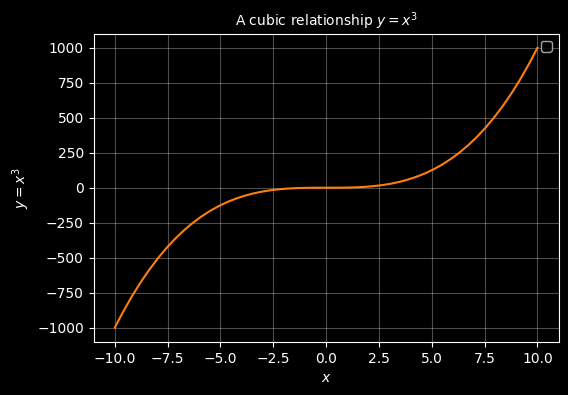

In [22]:
# generate a cubic curve - this time use numpy to generatre Y but coud just as wasily use Y = X * X * X
X = np.linspace(-10, 10, 50)
Y = np.power(X,3)

# use a dark background and light gridlines to show
with plt.style.context("dark_background"):
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.set_xlabel(r"$x$")
    ax.set_ylabel("$y=x^3$")
    ax.set_title("A cubic relationship $y=x^3$", fontsize="10")
    ax.legend()
    ax.plot(X, Y, color="#ff7f0e")
    ax.grid(True, alpha=0.3)

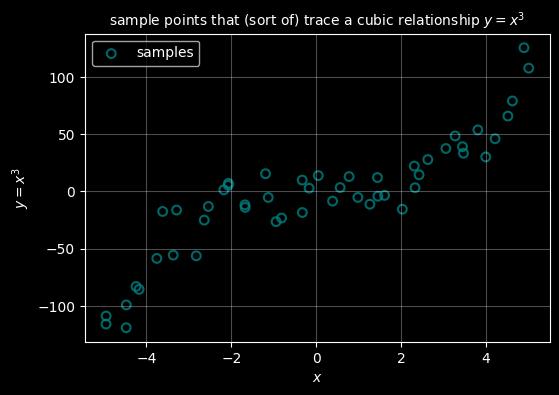

In [23]:
# Fist create a smooth ccubic xurve of 400 points between -5 and 5
X = np.linspace(-5, 5 , 400)
Y = X**3


# Now lets seprately create 50 samples that sort of follow that curve
# TO achieve that we add some random noise using a random noise gnereator
rng = np.random.default_rng(42)
X_samp = np.linspace(-5, 5, 50) + rng.normal(loc=0.0, scale=0.15, size=50)
Y_samp = X_samp**3 + rng.normal(loc=0.0, scale=20.0, size=50)

# --- plot ---
with plt.style.context("dark_background"):
    fig, ax = plt.subplots(figsize=(6, 4))

    # plot the cubic line
    #ax.plot(X, Y, color="#ff7f0e", linewidth=2, label=r"$y = x^3$")

    # plot the sample points
    ax.scatter(X_samp, Y_samp, s=40, marker="o", facecolors="none",\
        edgecolors="teal",linewidths=1.5, alpha=0.8, label="samples" )

    ax.grid(True, alpha=0.3)
    ax.set_xlabel(r"$x$")
    ax.set_ylabel("$y=x^3$")
    ax.set_title("sample points that (sort of) trace a cubic relationship $y=x^3$", fontsize="10")
    ax.legend()

plt.show()


### For a cubic function the relationship is of the form:

$y = ax + bx^2 + cx^3 + d$ 

We do exactly the same as for quadratic - we just add another feature, this time $x^3$ and use the same formula to determine the values of $a,b,c,d$.

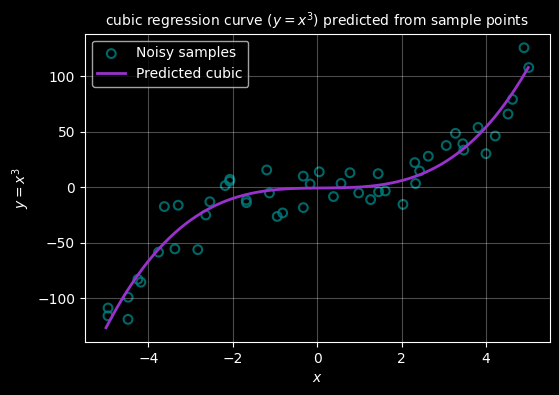

In [26]:
# First create a smooth cubic curve of 400 points between -5 and 5
X = np.linspace(-5, 5, 400)
Y = X**3

# Now separately create 50 samples that sort of follow that curve
# To achieve that we add some random noise using a random noise generator
rng = np.random.default_rng(42)
X_samp = np.linspace(-5, 5, 50) + rng.normal(loc=0.0, scale=0.15, size=50)
Y_samp = X_samp**3 + rng.normal(loc=0.0, scale=20.0, size=50)

# ------------------------------------------------------------
# Predict the cubic from the samples using feature transformation
#
# Cubic features: [1, x, x^2, x^3]
# Normal equation: W = (Xᵀ X)⁻¹ Xᵀ y
# W = [c, b, a, d] so: y = d x^3 + a x^2 + b x + c
# ------------------------------------------------------------
X_design = np.column_stack([
    np.ones_like(X_samp),
    X_samp,
    X_samp**2,
    X_samp**3
])

W = np.linalg.inv(X_design.T @ X_design) @ (X_design.T @ Y_samp)

c_pred, b_pred, a_pred, d_pred = W

# Predicted cubic curve
Y_pred = d_pred * X**3 + a_pred * X**2 + b_pred * X + c_pred

# --- plot ---
with plt.style.context("dark_background"):
    fig, ax = plt.subplots(figsize=(6, 4))

    # True cubic relationship (orange)
    #ax.plot(X, Y, color="#ff7f0e", linewidth=2, label=r"$y = x^3$")

    # Noisy samples (teal)
    ax.scatter(X_samp, Y_samp, s=40, marker="o",
               facecolors="none", edgecolors="teal",
               linewidths=1.5, alpha=0.8, label="Noisy samples")

    # Predicted cubic (darkorchid)
    ax.plot(X, Y_pred, color="darkorchid", linewidth=2, label="Predicted cubic")

    ax.grid(True, alpha=0.3)
    ax.set_xlabel(r"$x$")
    ax.set_ylabel("$y=x^3$")
    ax.set_title("cubic regression curve ($y=x^3$) predicted from sample points", fontsize="10")
    ax.legend()

plt.show()



# ALTERNATIVE USING RBF

### Radial Basis Function (RBF) feature transformation

Polynomial features work well for smooth global trends, but they are less
flexible when the relationship changes locally.

An alternative approach is to transform each input using **radial basis
functions (RBFs)**.

An RBF is centred at a point μ and measures how close x is to that centre:

$$
\phi(x) = \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)
$$

Each RBF produces a local feature that is strongest near its centre and
decays smoothly with distance.

By placing several RBFs across the input range, we can represent complex
non-linear relationships while still using the same linear regression
formula:

$$
W = (X^\top X)^{-1} X^\top y
$$

As before, only the **feature representation** changes — not the method
used to determine the weights.


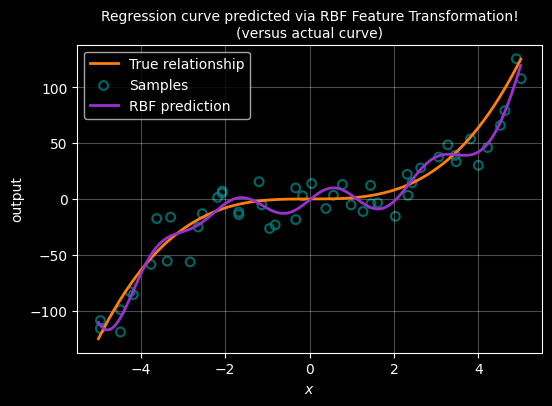

In [30]:
# ------------------------------------------------------------
# True underlying cubic relationship (unchanged)
# ------------------------------------------------------------
X = np.linspace(-5, 5, 400)
Y = X**3

# Noisy samples
rng = np.random.default_rng(42)
X_samp = np.linspace(-5, 5, 50) + rng.normal(0.0, 0.15, size=50)
Y_samp = X_samp**3 + rng.normal(0.0, 20.0, size=50)



# ------------------------------------------------------------
# RBF feature transformation
#
# Each RBF is centred at μ and has width σ:
#   φ(x) = exp(-(x - μ)^2 / (2σ^2))
# ------------------------------------------------------------
n_centres = 10
centres = np.linspace(-5, 5, n_centres)
sigma = 1.0

def rbf(x, mu, sigma):
    return np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))



# Build design matrix: [1, φ1(x), φ2(x), ..., φk(x)]
X_design = np.column_stack(
    [np.ones_like(X_samp)] +
    [rbf(X_samp, mu, sigma) for mu in centres]
)


# Normal equation (unchanged)
W = np.linalg.inv(X_design.T @ X_design) @ (X_design.T @ Y_samp)

# ------------------------------------------------------------
# Generate predicted curve using the learned RBF weights
# ------------------------------------------------------------
X_pred_design = np.column_stack(
    [np.ones_like(X)] +
    [rbf(X, mu, sigma) for mu in centres]
)

Y_pred = X_pred_design @ W

# ------------------------------------------------------------
# Plot
# ------------------------------------------------------------
with plt.style.context("dark_background"):
    fig, ax = plt.subplots(figsize=(6, 4))

    # True cubic
    ax.plot(X, Y, color="#ff7f0e", linewidth=2, label="True relationship")

    # Noisy samples
    ax.scatter(X_samp, Y_samp, s=40, marker="o",
               facecolors="none", edgecolors="teal",
               linewidths=1.5, alpha=0.8, label="Samples")

    # RBF prediction
    ax.plot(X, Y_pred, color="darkorchid", linewidth=2, label="RBF prediction")

    ax.grid(True, alpha=0.3)
    ax.set_xlabel(r"$x$")
    ax.set_ylabel("output")
    ax.set_title("Regression curve predicted via RBF Feature Transformation!\n(versus actual curve)", fontsize="10")
    ax.legend()

plt.show()
